## This script can be used to calculate Wet Bulb Globe Temperature (WBGT) using standard meteorological outputs from WRF model. In particular, this sample script corresponds to Fig. 7B in the published paper.

* The calculations are done using Thermofeel library which is developed by ECMWF. To know more about Thermofeel, feel free to read the paper below:
https://www.sciencedirect.com/science/article/pii/S2352711022000176#b18


* Thermofeel documentation is here:
https://thermofeel.readthedocs.io/en/latest/?

* Also a pdf of the documention can be found here:
https://thermofeel.readthedocs.io/_/downloads/en/latest/pdf/

* The Github repository of Thermofeel is located here:
https://github.com/ecmwf/thermofeel


In [ ]:
#These are all the libraries you will need to use this notebook

!pip install thermofeel
!pip install netCDF4
import thermofeel
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import thermofeel as tf

In [ ]:
# Read model output data to be used in Thermofeel

# First calculate WBGT and its parameters for WRF outputs without irrigation.

import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_aug_sensor = rh_20[168:912, :, :]; del rh_20;#
rh_20_aug_sensor = shift(rh_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_aug_sensor.shape)

# Read NetCDF file for dew point temperature at 2m
td_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m.nc')
td_20 = td_dataset['td2m'][:]; del td_dataset;
print(td_20.shape)
td_20_aug_sensor = td_20[168:912, :, :]; del td_20;#
td_20_aug_sensor = shift(td_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(td_20_aug_sensor.shape)

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug_sensor = T2_20[168:912, :, :]; del T2_20;#
T2_20_aug_sensor = shift(T2_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_sensor.shape)

# now read wind speed data

u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug_sensor = u_20[168:912, :, :]; del u_20;#
u_20_20_aug_sensor = shift(u_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_aug_sensor.shape)

v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug_sensor = v_20[168:912, :, :]; del v_20;#
v_20_20_aug_sensor = shift(v_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_aug_sensor.shape)

ws_20_aug_sensor = np.sqrt(u_20_20_aug_sensor**2+v_20_20_aug_sensor**2);

# Now read radiation fields

coszen_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
coszen_20 = coszen_dataset['coszen'][:]; del coszen_dataset;
print(coszen_20.shape)
coszen_20_aug_sensor = coszen_20[168:912, :, :]; del coszen_20;#
coszen_20_aug_sensor = shift(coszen_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(coszen_20_aug_sensor.shape)

swdown_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swdown_20 = swdown_dataset['swdown'][:]; del swdown_dataset;
print(swdown_20.shape)
swdown_20_aug_sensor = swdown_20[168:912, :, :]; del swdown_20;#
swdown_20_aug_sensor = shift(swdown_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swdown_20_aug_sensor.shape)

glw_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
glw_20 = glw_dataset['glw'][:]; del glw_dataset;
print(glw_20.shape)
glw_20_aug_sensor = glw_20[168:912, :, :]; del glw_20;#
glw_20_aug_sensor = shift(glw_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(glw_20_aug_sensor.shape)

swddir_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swddir_20 = swddir_dataset['swddir'][:]; del swddir_dataset;
print(swddir_20.shape)
swddir_20_aug_sensor = swddir_20[168:912, :, :]; del swddir_20;#
swddir_20_aug_sensor = shift(swddir_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddir_20_aug_sensor.shape)

swddni_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swddni_20 = swddni_dataset['swddni'][:]; del swddni_dataset;
print(swddni_20.shape)
swddni_20_aug_sensor = swddni_20[168:912, :, :]; del swddni_20;#
swddni_20_aug_sensor = shift(swddni_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddni_20_aug_sensor.shape)

swupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swupb_20 = swupb_dataset['swupb'][:]; del swupb_dataset;
print(swupb_20.shape)
swupb_20_aug_sensor = swupb_20[168:912, :, :]; del swupb_20;#
swupb_20_aug_sensor = shift(swupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swupb_20_aug_sensor.shape)

lwupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
lwupb_20 = lwupb_dataset['lwupb'][:]; del lwupb_dataset;
print(lwupb_20.shape)
lwupb_20_aug_sensor = lwupb_20[168:912, :, :]; del lwupb_20;#
lwupb_20_aug_sensor = shift(lwupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(lwupb_20_aug_sensor.shape)


# Calculation the net radiation fields required, which are input to GT/WBGT

ssr = swdown_20_aug_sensor-swupb_20_aug_sensor # surface net solar radiation
strr = glw_20_aug_sensor-lwupb_20_aug_sensor # surface net thermal radiation

ssrd = swdown_20_aug_sensor;
dsrp = swddni_20_aug_sensor;
strd = glw_20_aug_sensor;
fdir = swddir_20_aug_sensor;
cossza = coszen_20_aug_sensor;
td_k = td_20_aug_sensor;
t2_k = T2_20_aug_sensor;
va = ws_20_aug_sensor;
rh = rh_20_aug_sensor

print(np.max(cossza))
print(np.min(cossza))

In [ ]:
#Check the availability of thermofeel functions and import them
print(dir(thermofeel))

# import the required thermofeel functions

from thermofeel import (
    calculate_apparent_temperature,
    calculate_bgt,
    calculate_heat_index_adjusted,
    calculate_heat_index_simplified,
    calculate_humidex,
    calculate_mean_radiant_temperature,
    calculate_mrt_from_bgt,
    calculate_normal_effective_temperature,
    calculate_relative_humidity_percent,
    calculate_saturation_vapour_pressure,
    calculate_utci,
    calculate_wbgt_simple,
    calculate_wbgt,
    calculate_wbgt_simple,
    calculate_wbt,
    calculate_wind_chill,
    kelvin_to_celsius,
    kelvin_to_fahrenheit,
    approximate_dsrp,
    helpers,
)


# To calculate WBGT, we neet WBT (we bulb temperature), GT (globe temperature) and dry-bulb temperature (2-m air temp.)

# First Calculate WBT

tw_k = calculate_wbt(t2_k, rh)

# convert to F for plotting
tw_f = kelvin_to_fahrenheit(tw_k)

# convert to C for the use in WBGT
tw_c = kelvin_to_celsius(tw_k)
print('tw_c')
print(np.nanmax(tw_c))
print(np.nanmin(tw_c))


# Now calculate mean radiant temperature (mrt) because it is an input for calculating the Black Globe Temperature (bgt)
# this is necessary since black globe temperature is not commonly available. It should be in K

mrt = calculate_mean_radiant_temperature(ssrd=ssrd, ssr=ssr, dsrp=dsrp, strd=strd, fdir=fdir, strr=strr, cossza=cossza)
print('mrt')
print(np.nanmax(mrt))
print(np.nanmin(mrt))

# Now calculate Black Globe Temperature using the above-calculated MRT and then calculate WBGT

import math

from thermofeel.helpers import (celsius_to_kelvin, fahrenheit_to_kelvin, kelvin_to_celsius, kelvin_to_fahrenheit)

#converting to float128 was needed to avoid a warning in calculating bgt because there are so many smaller terms in the equation

t2_k = np.float128(t2_k)
mrt = np.float128(mrt)
va = np.float128(va)

bgt_k = calculate_bgt(t2_k, mrt, va)
print('bgt_k')
print(np.nanmax(bgt_k))
print(np.nanmin(bgt_k))

# Convert bgt from C to F for plotting
bgt_f = kelvin_to_fahrenheit(bgt_k)

#convert bgt in Kelvin to Celsius to be used in WBGT
bgt_c = kelvin_to_celsius(bgt_k)

# convert 2-m air temperature from Kelvin to F for plotting
t2_f = kelvin_to_fahrenheit(t2_k)

# convert 2-m air temperature from Kelvin to Celsius to be used in WBGT
t2_c = kelvin_to_celsius(t2_k)

# Now calculate WBGT

wbgt = 0.7 * tw_c + 0.2 * bgt_c + 0.1 * t2_c
wbgt_k = celsius_to_kelvin(wbgt)

wbgt_f = kelvin_to_fahrenheit(wbgt_k)

wbgt_f_reshape_aug_noirr = np.reshape(wbgt, (24, 31, 171, 162), order='F');
del wbgt_f;

bgt_c_reshape_aug_noirr = np.reshape(bgt_c, (24, 31, 171, 162), order='F');
del bgt_c;

tw_c_reshape_aug_noirr = np.reshape(tw_c, (24, 31, 171, 162), order='F');
del tw_c;

t2_c_reshape_aug_noirr = np.reshape(t2_c, (24, 31, 171, 162), order='F');
del t2_c;

In [ ]:
# Now repeat the calculation of WBGT and its parameters for WRF outputs with irrigation.

import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m_irr.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_aug_sensor = rh_20[168:912, :, :]; del rh_20;#
rh_20_aug_sensor = shift(rh_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_aug_sensor.shape)

# Read NetCDF file for dew point temperature at 2m
td_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m_irr.nc')
td_20 = td_dataset['td2m'][:]; del td_dataset;
print(td_20.shape)
td_20_aug_sensor = td_20[168:912, :, :]; del td_20;#
td_20_aug_sensor = shift(td_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(td_20_aug_sensor.shape)

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug_sensor = T2_20[168:912, :, :]; del T2_20;#
T2_20_aug_sensor = shift(T2_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_sensor.shape)

# now read wind speed data

u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug_sensor = u_20[168:912, :, :]; del u_20;#
u_20_20_aug_sensor = shift(u_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_aug_sensor.shape)

v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug_sensor = v_20[168:912, :, :]; del v_20;#
v_20_20_aug_sensor = shift(v_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_aug_sensor.shape)

ws_20_aug_sensor = np.sqrt(u_20_20_aug_sensor**2+v_20_20_aug_sensor**2);

# Now read radiation fields

coszen_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
coszen_20 = coszen_dataset['coszen'][:]; del coszen_dataset;
print(coszen_20.shape)
coszen_20_aug_sensor = coszen_20[168:912, :, :]; del coszen_20;#
coszen_20_aug_sensor = shift(coszen_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(coszen_20_aug_sensor.shape)

swdown_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swdown_20 = swdown_dataset['swdown'][:]; del swdown_dataset;
print(swdown_20.shape)
swdown_20_aug_sensor = swdown_20[168:912, :, :]; del swdown_20;#
swdown_20_aug_sensor = shift(swdown_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swdown_20_aug_sensor.shape)

glw_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
glw_20 = glw_dataset['glw'][:]; del glw_dataset;
print(glw_20.shape)
glw_20_aug_sensor = glw_20[168:912, :, :]; del glw_20;#
glw_20_aug_sensor = shift(glw_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(glw_20_aug_sensor.shape)

swddir_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swddir_20 = swddir_dataset['swddir'][:]; del swddir_dataset;
print(swddir_20.shape)
swddir_20_aug_sensor = swddir_20[168:912, :, :]; del swddir_20;#
swddir_20_aug_sensor = shift(swddir_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddir_20_aug_sensor.shape)

swddni_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swddni_20 = swddni_dataset['swddni'][:]; del swddni_dataset;
print(swddni_20.shape)
swddni_20_aug_sensor = swddni_20[168:912, :, :]; del swddni_20;#
swddni_20_aug_sensor = shift(swddni_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddni_20_aug_sensor.shape)

swupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swupb_20 = swupb_dataset['swupb'][:]; del swupb_dataset;
print(swupb_20.shape)
swupb_20_aug_sensor = swupb_20[168:912, :, :]; del swupb_20;#
swupb_20_aug_sensor = shift(swupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swupb_20_aug_sensor.shape)

lwupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
lwupb_20 = lwupb_dataset['lwupb'][:]; del lwupb_dataset;
print(lwupb_20.shape)
lwupb_20_aug_sensor = lwupb_20[168:912, :, :]; del lwupb_20;#
lwupb_20_aug_sensor = shift(lwupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(lwupb_20_aug_sensor.shape)


# Calculation the net radiation fields required, which are input to GT/WBGT

ssr = swdown_20_aug_sensor-swupb_20_aug_sensor # surface net solar radiation
strr = glw_20_aug_sensor-lwupb_20_aug_sensor # surface net thermal radiation

ssrd = swdown_20_aug_sensor;
dsrp = swddni_20_aug_sensor;
strd = glw_20_aug_sensor;
fdir = swddir_20_aug_sensor;
cossza = coszen_20_aug_sensor;
td_k = td_20_aug_sensor;
t2_k = T2_20_aug_sensor;
va = ws_20_aug_sensor;
rh = rh_20_aug_sensor

print(np.max(cossza))
print(np.min(cossza))


In [ ]:

# First Calculate WBT

tw_k = calculate_wbt(t2_k, rh)

# convert to F for plotting
tw_f = kelvin_to_fahrenheit(tw_k)

# convert to C for the use in WBGT
tw_c = kelvin_to_celsius(tw_k)
print('tw_c')
print(np.nanmax(tw_c))
print(np.nanmin(tw_c))


# Now calculate mean radiant temperature (mrt) because it is an input for calculating the Black Globe Temperature (bgt)
# this is necessary since black globe temperature is not commonly available. It should be in K

mrt = calculate_mean_radiant_temperature(ssrd=ssrd, ssr=ssr, dsrp=dsrp, strd=strd, fdir=fdir, strr=strr, cossza=cossza)
print('mrt')
print(np.nanmax(mrt))
print(np.nanmin(mrt))

# Now calculate Black Globe Temperature using the above-calculated MRT and then calculate WBGT

import math

from thermofeel.helpers import (celsius_to_kelvin, fahrenheit_to_kelvin, kelvin_to_celsius, kelvin_to_fahrenheit)

#converting to float128 was needed to avoid a warning in calculating bgt because there are so many smaller terms in the equation

t2_k = np.float128(t2_k)
mrt = np.float128(mrt)
va = np.float128(va)

bgt_k = calculate_bgt(t2_k, mrt, va)
print('bgt_k')
print(np.nanmax(bgt_k))
print(np.nanmin(bgt_k))

# Convert bgt from C to F for plotting
bgt_f = kelvin_to_fahrenheit(bgt_k)

#convert bgt in Kelvin to Celsius to be used in WBGT
bgt_c = kelvin_to_celsius(bgt_k)

# convert 2-m air temperature from Kelvin to F for plotting
t2_f = kelvin_to_fahrenheit(t2_k)

# convert 2-m air temperature from Kelvin to Celsius to be used in WBGT
t2_c = kelvin_to_celsius(t2_k)

# Now calculate WBGT

wbgt = 0.7 * tw_c + 0.2 * bgt_c + 0.1 * t2_c
wbgt_k = celsius_to_kelvin(wbgt)

wbgt_f = kelvin_to_fahrenheit(wbgt_k)

# calculate max and average

wbgt_f_reshape_aug_irr = np.reshape(wbgt, (24, 31, 171, 162), order='F');
del wbgt_f;

bgt_c_reshape_aug_irr = np.reshape(bgt_c, (24, 31, 171, 162), order='F');
del bgt_c;

tw_c_reshape_aug_irr = np.reshape(tw_c, (24, 31, 171, 162), order='F');
del tw_c;

t2_c_reshape_aug_irr = np.reshape(t2_c, (24, 31, 171, 162), order='F');
del t2_c;

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'approximate_dsrp', 'calculate_apparent_temperature', 'calculate_bgt', 'calculate_dew_point_from_relative_humidity', 'calculate_heat_index_adjusted', 'calculate_heat_index_simplified', 'calculate_humidex', 'calculate_mean_radiant_temperature', 'calculate_mrt_from_bgt', 'calculate_nonsaturation_vapour_pressure', 'calculate_normal_effective_temperature', 'calculate_relative_humidity_percent', 'calculate_saturation_vapour_pressure', 'calculate_saturation_vapour_pressure_multiphase', 'calculate_utci', 'calculate_utci_polynomial', 'calculate_wbgt', 'calculate_wbgt_simple', 'calculate_wbt', 'calculate_wind_chill', 'celsius_to_kelvin', 'fahrenheit_to_kelvin', 'helpers', 'kelvin_to_celsius', 'kelvin_to_fahrenheit', 'math', 'np', 'scale_windspeed', 'thermofeel', 'to_radians']


/usr/local/lib/python3.10/dist-packages/thermofeel/thermofeel.py:546: RuntimeWarning: invalid value encountered in power
  + 0.00391838 * (rh) ** (3 / 2) * np.arctan(0.023101 * rh)


tw_c
33.80313
-0.7930908
mrt
362.50577
259.936
bgt_k
350.10933938816651073
267.24476250852209774


In [ ]:
# Calculate difference of wbgt between irrigation and no-irrigation simulations for day and night separately

#day and night plot

# first irrigation

wbgt_f_diurnal_aug_day_sensor_irr = wbgt_f_reshape_aug_irr[7:19, :, :, :];
wbgt_f_diurnal_aug_night_sensor_irr = wbgt_f_reshape_aug_irr[np.r_[0:7, 19:24], :, :, :]; del wbgt_f_reshape_aug_irr;

wbgt_f_reshape_aug_irr_time_points_day = np.reshape(wbgt_f_diurnal_aug_day_sensor_irr, (372, 27702), order='F');
wbgt_f_reshape_aug_irr_time_points_night = np.reshape(wbgt_f_diurnal_aug_night_sensor_irr, (372, 27702), order='F');

wbgt_f_diurnal_aug_day_sensor_mn_irr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_irr, axis=0); del wbgt_f_diurnal_aug_day_sensor_irr;
wbgt_f_diurnal_aug_day_sensor_mn_mon_irr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_mn_irr, axis=0); del wbgt_f_diurnal_aug_day_sensor_mn_irr;

wbgt_f_diurnal_aug_night_sensor_mn_irr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_irr, axis=0); del wbgt_f_diurnal_aug_night_sensor_irr;
wbgt_f_diurnal_aug_night_sensor_mn_mon_irr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_mn_irr, axis=0); del wbgt_f_diurnal_aug_night_sensor_mn_irr;

# Now for no-irrigation
wbgt_f_diurnal_aug_day_sensor_noirr = wbgt_f_reshape_aug_noirr[7:19, :, :, :];
wbgt_f_diurnal_aug_night_sensor_noirr = wbgt_f_reshape_aug_noirr[np.r_[0:7, 19:24], :, :, :]; del wbgt_f_reshape_aug_noirr;

wbgt_f_reshape_aug_noirr_time_points_day = np.reshape(wbgt_f_diurnal_aug_day_sensor_noirr, (372, 27702), order='F');
wbgt_f_reshape_aug_noirr_time_points_night = np.reshape(wbgt_f_diurnal_aug_night_sensor_noirr, (372, 27702), order='F');

wbgt_f_diurnal_aug_day_sensor_mn_noirr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_noirr, axis=0); del wbgt_f_diurnal_aug_day_sensor_noirr;
wbgt_f_diurnal_aug_day_sensor_mn_mon_noirr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_mn_noirr, axis=0); del wbgt_f_diurnal_aug_day_sensor_mn_noirr;

wbgt_f_diurnal_aug_night_sensor_mn_noirr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_noirr, axis=0); del wbgt_f_diurnal_aug_night_sensor_noirr;
wbgt_f_diurnal_aug_night_sensor_mn_mon_noirr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_mn_noirr, axis=0); del wbgt_f_diurnal_aug_night_sensor_mn_noirr;

wbgt_f_diff_diff_day = wbgt_f_diurnal_aug_day_sensor_mn_mon_irr-wbgt_f_diurnal_aug_day_sensor_mn_mon_noirr; del wbgt_f_diurnal_aug_day_sensor_mn_mon_irr;
wbgt_f_diff_diff_night = wbgt_f_diurnal_aug_night_sensor_mn_mon_irr-wbgt_f_diurnal_aug_night_sensor_mn_mon_noirr; del wbgt_f_diurnal_aug_night_sensor_mn_mon_irr;




In [ ]:
# Now calculate difference of BGT


# first irrigation


bgt_c_diurnal_aug_day_sensor_irr = bgt_c_reshape_aug_irr[7:19, :, :, :];
bgt_c_diurnal_aug_night_sensor_irr = bgt_c_reshape_aug_irr[np.r_[0:7, 19:24], :, :, :]; del bgt_c_reshape_aug_irr;

bgt_c_reshape_aug_irr_time_points_day = np.reshape(bgt_c_diurnal_aug_day_sensor_irr, (372, 27702), order='F');
bgt_c_reshape_aug_irr_time_points_night = np.reshape(bgt_c_diurnal_aug_night_sensor_irr, (372, 27702), order='F');


bgt_c_diurnal_aug_day_sensor_mn_irr = np.nanmean(bgt_c_diurnal_aug_day_sensor_irr, axis=0); del bgt_c_diurnal_aug_day_sensor_irr;
bgt_c_diurnal_aug_day_sensor_mn_mon_irr = np.nanmean(bgt_c_diurnal_aug_day_sensor_mn_irr, axis=0); del bgt_c_diurnal_aug_day_sensor_mn_irr;

bgt_c_diurnal_aug_night_sensor_mn_irr = np.nanmean(bgt_c_diurnal_aug_night_sensor_irr, axis=0); del bgt_c_diurnal_aug_night_sensor_irr;
bgt_c_diurnal_aug_night_sensor_mn_mon_irr = np.nanmean(bgt_c_diurnal_aug_night_sensor_mn_irr, axis=0); del bgt_c_diurnal_aug_night_sensor_mn_irr;

# now for no-irr
bgt_c_diurnal_aug_day_sensor_noirr = bgt_c_reshape_aug_noirr[7:19, :, :, :];
bgt_c_diurnal_aug_night_sensor_noirr = bgt_c_reshape_aug_noirr[np.r_[0:7, 19:24], :, :, :]; del bgt_c_reshape_aug_noirr;

bgt_c_reshape_aug_noirr_time_points_day = np.reshape(bgt_c_diurnal_aug_day_sensor_noirr, (372, 27702), order='F');
bgt_c_reshape_aug_noirr_time_points_night = np.reshape(bgt_c_diurnal_aug_night_sensor_noirr, (372, 27702), order='F');

bgt_c_diurnal_aug_day_sensor_mn_noirr = np.nanmean(bgt_c_diurnal_aug_day_sensor_noirr, axis=0); del bgt_c_diurnal_aug_day_sensor_noirr;
bgt_c_diurnal_aug_day_sensor_mn_mon_noirr = np.nanmean(bgt_c_diurnal_aug_day_sensor_mn_noirr, axis=0); del bgt_c_diurnal_aug_day_sensor_mn_noirr;

bgt_c_diurnal_aug_night_sensor_mn_noirr = np.nanmean(bgt_c_diurnal_aug_night_sensor_noirr, axis=0); del bgt_c_diurnal_aug_night_sensor_noirr;
bgt_c_diurnal_aug_night_sensor_mn_mon_noirr = np.nanmean(bgt_c_diurnal_aug_night_sensor_mn_noirr, axis=0); del bgt_c_diurnal_aug_night_sensor_mn_noirr;

bgt_c_diff_diff_day = bgt_c_diurnal_aug_day_sensor_mn_mon_irr-bgt_c_diurnal_aug_day_sensor_mn_mon_noirr; del bgt_c_diurnal_aug_day_sensor_mn_mon_irr;
bgt_c_diff_diff_night = bgt_c_diurnal_aug_night_sensor_mn_mon_irr-bgt_c_diurnal_aug_night_sensor_mn_mon_noirr; del bgt_c_diurnal_aug_night_sensor_mn_mon_irr;




In [ ]:
# likewise, calculate the difference for WBT (tw_c)

tw_c_diurnal_aug_day_sensor_irr = tw_c_reshape_aug_irr[7:19, :, :, :];
tw_c_diurnal_aug_night_sensor_irr = tw_c_reshape_aug_irr[np.r_[0:7, 19:24], :, :, :]; del tw_c_reshape_aug_irr;

tw_c_reshape_aug_irr_time_points_day = np.reshape(tw_c_diurnal_aug_day_sensor_irr, (372, 27702), order='F');
tw_c_reshape_aug_irr_time_points_night = np.reshape(tw_c_diurnal_aug_night_sensor_irr, (372, 27702), order='F');


tw_c_diurnal_aug_day_sensor_mn_irr = np.nanmean(tw_c_diurnal_aug_day_sensor_irr, axis=0); del tw_c_diurnal_aug_day_sensor_irr;
tw_c_diurnal_aug_day_sensor_mn_mon_irr = np.nanmean(tw_c_diurnal_aug_day_sensor_mn_irr, axis=0); del tw_c_diurnal_aug_day_sensor_mn_irr;

tw_c_diurnal_aug_night_sensor_mn_irr = np.nanmean(tw_c_diurnal_aug_night_sensor_irr, axis=0); del tw_c_diurnal_aug_night_sensor_irr;
tw_c_diurnal_aug_night_sensor_mn_mon_irr = np.nanmean(tw_c_diurnal_aug_night_sensor_mn_irr, axis=0); del tw_c_diurnal_aug_night_sensor_mn_irr;

# for no irr
tw_c_diurnal_aug_day_sensor_noirr = tw_c_reshape_aug_noirr[7:19, :, :, :];
tw_c_diurnal_aug_night_sensor_noirr = tw_c_reshape_aug_noirr[np.r_[0:7, 19:24], :, :, :]; del tw_c_reshape_aug_noirr;

tw_c_reshape_aug_noirr_time_points_day = np.reshape(tw_c_diurnal_aug_day_sensor_noirr, (372, 27702), order='F');
tw_c_reshape_aug_noirr_time_points_night = np.reshape(tw_c_diurnal_aug_night_sensor_noirr, (372, 27702), order='F');

tw_c_diurnal_aug_day_sensor_mn_noirr = np.nanmean(tw_c_diurnal_aug_day_sensor_noirr, axis=0); del tw_c_diurnal_aug_day_sensor_noirr;
tw_c_diurnal_aug_day_sensor_mn_mon_noirr = np.nanmean(tw_c_diurnal_aug_day_sensor_mn_noirr, axis=0); del tw_c_diurnal_aug_day_sensor_mn_noirr;

tw_c_diurnal_aug_night_sensor_mn_noirr = np.nanmean(tw_c_diurnal_aug_night_sensor_noirr, axis=0); del tw_c_diurnal_aug_night_sensor_noirr;
tw_c_diurnal_aug_night_sensor_mn_mon_noirr = np.nanmean(tw_c_diurnal_aug_night_sensor_mn_noirr, axis=0); del tw_c_diurnal_aug_night_sensor_mn_noirr;

tw_c_diff_diff_day = tw_c_diurnal_aug_day_sensor_mn_mon_irr-tw_c_diurnal_aug_day_sensor_mn_mon_noirr; del tw_c_diurnal_aug_day_sensor_mn_mon_irr;
tw_c_diff_diff_night = tw_c_diurnal_aug_night_sensor_mn_mon_irr-tw_c_diurnal_aug_night_sensor_mn_mon_noirr; del tw_c_diurnal_aug_night_sensor_mn_mon_irr;


In [ ]:
# likewise, calculate the difference for DBT (t2_c)

# first for irrigation run

t2_c_diurnal_aug_day_sensor_irr = t2_c_reshape_aug_irr[7:19, :, :, :];
t2_c_diurnal_aug_night_sensor_irr = t2_c_reshape_aug_irr[np.r_[0:7, 19:24], :, :, :]; del t2_c_reshape_aug_irr;

t2_c_reshape_aug_irr_time_points_day = np.reshape(t2_c_diurnal_aug_day_sensor_irr, (372, 27702), order='F');
t2_c_reshape_aug_irr_time_points_night = np.reshape(t2_c_diurnal_aug_night_sensor_irr, (372, 27702), order='F');


t2_c_diurnal_aug_day_sensor_mn_irr = np.nanmean(t2_c_diurnal_aug_day_sensor_irr, axis=0); del t2_c_diurnal_aug_day_sensor_irr;
t2_c_diurnal_aug_day_sensor_mn_mon_irr = np.nanmean(t2_c_diurnal_aug_day_sensor_mn_irr, axis=0); del t2_c_diurnal_aug_day_sensor_mn_irr;

t2_c_diurnal_aug_night_sensor_mn_irr = np.nanmean(t2_c_diurnal_aug_night_sensor_irr, axis=0); del t2_c_diurnal_aug_night_sensor_irr;
t2_c_diurnal_aug_night_sensor_mn_mon_irr = np.nanmean(t2_c_diurnal_aug_night_sensor_mn_irr, axis=0); del t2_c_diurnal_aug_night_sensor_mn_irr;

# for no-irr run

t2_c_diurnal_aug_day_sensor_noirr = t2_c_reshape_aug_noirr[7:19, :, :, :];
t2_c_diurnal_aug_night_sensor_noirr = t2_c_reshape_aug_noirr[np.r_[0:7, 19:24], :, :, :]; del t2_c_reshape_aug_noirr;

t2_c_reshape_aug_noirr_time_points_day = np.reshape(t2_c_diurnal_aug_day_sensor_noirr, (372, 27702), order='F');
t2_c_reshape_aug_noirr_time_points_night = np.reshape(t2_c_diurnal_aug_night_sensor_noirr, (372, 27702), order='F');

t2_c_diurnal_aug_day_sensor_mn_noirr = np.nanmean(t2_c_diurnal_aug_day_sensor_noirr, axis=0); del t2_c_diurnal_aug_day_sensor_noirr;
t2_c_diurnal_aug_day_sensor_mn_mon_noirr = np.nanmean(t2_c_diurnal_aug_day_sensor_mn_noirr, axis=0); del t2_c_diurnal_aug_day_sensor_mn_noirr;

t2_c_diurnal_aug_night_sensor_mn_noirr = np.nanmean(t2_c_diurnal_aug_night_sensor_noirr, axis=0); del t2_c_diurnal_aug_night_sensor_noirr;
t2_c_diurnal_aug_night_sensor_mn_mon_noirr = np.nanmean(t2_c_diurnal_aug_night_sensor_mn_noirr, axis=0); del t2_c_diurnal_aug_night_sensor_mn_noirr;

t2_c_diff_diff_day = t2_c_diurnal_aug_day_sensor_mn_mon_irr-t2_c_diurnal_aug_day_sensor_mn_mon_noirr; del t2_c_diurnal_aug_day_sensor_mn_mon_irr;
t2_c_diff_diff_night = t2_c_diurnal_aug_night_sensor_mn_mon_irr-t2_c_diurnal_aug_night_sensor_mn_mon_noirr; del t2_c_diurnal_aug_night_sensor_mn_mon_irr;

In [ ]:
# prepare for plotting the results

!pip install cartopy
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")


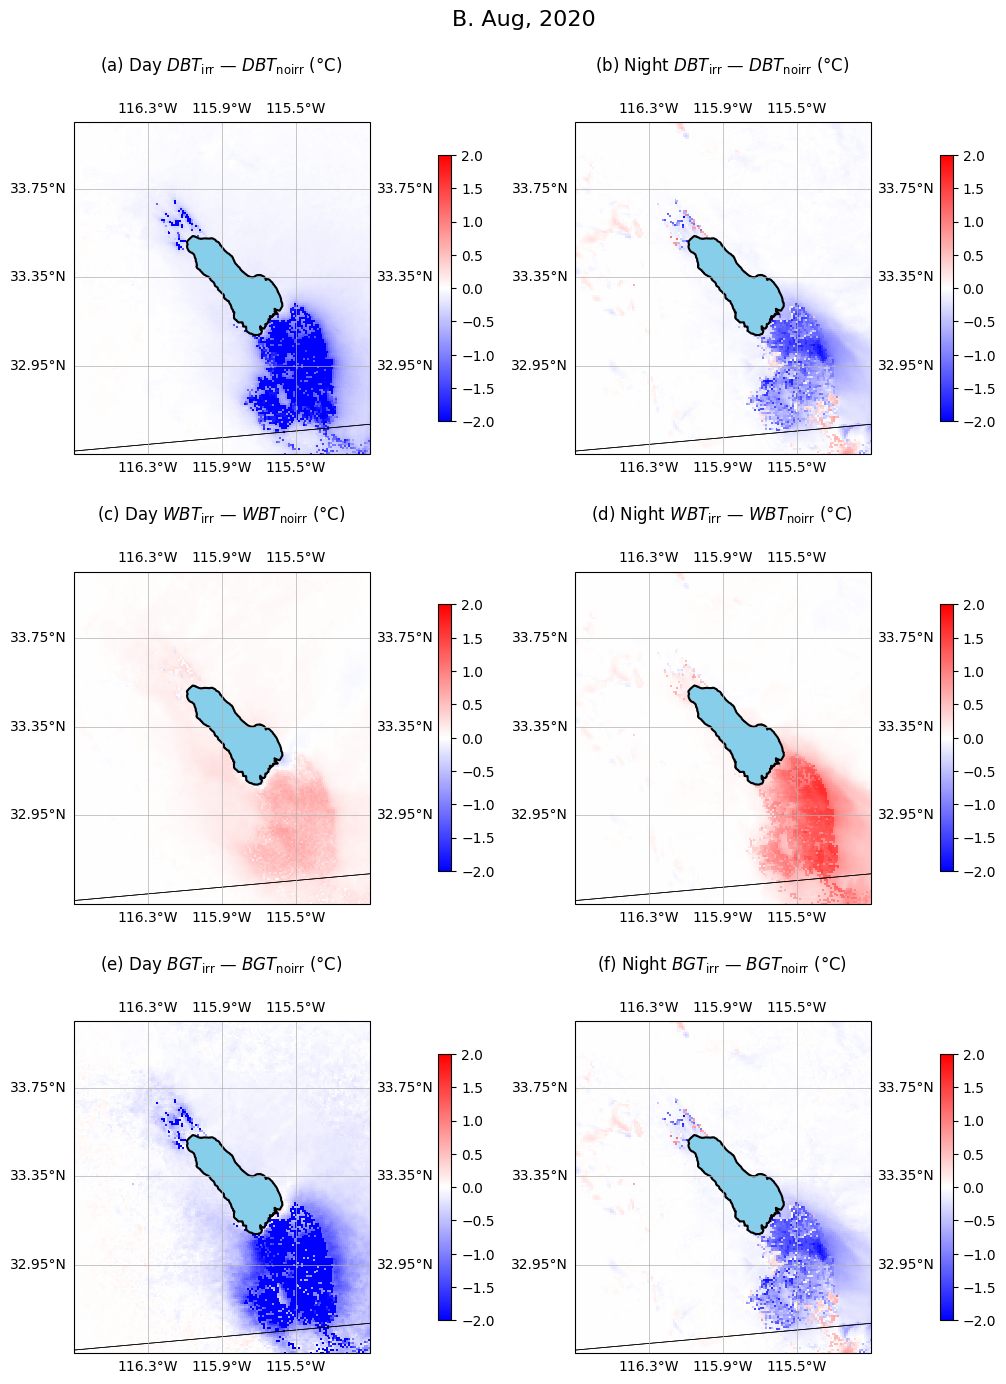

In [ ]:
# plot daily mean difference day and night without significance

plt.rcParams.update({'font.size': 10})


fig, ((ax_1, ax_2), (ax_3, ax_4), (ax_5, ax_6)) = plt.subplots(3, 2, figsize=(12, 16), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.17, hspace=0.35)  # Adjust the width space between subplots
fig.suptitle('B. Aug, 2020', fontsize=16, y=0.95)

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, t2_c_diff_diff_day, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Day $DBT_{\\mathrm{irr}}$ \u2014 $DBT_{\\mathrm{noirr}}$ (\u00b0C) \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.16)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, t2_c_diff_diff_night, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Night $DBT_{\\mathrm{irr}}$ \u2014 $DBT_{\\mathrm{noirr}}$ (\u00b0C) \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.16)

ax_3.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_3 = ax_3.pcolormesh(lon, lat, tw_c_diff_diff_day, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor='skyblue')
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('(c) Day $WBT_{\\mathrm{irr}}$ \u2014 $WBT_{\\mathrm{noirr}}$ (\u00b0C) \n');
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, shrink=0.8, pad=0.16)

ax_4.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_4 = ax_4.pcolormesh(lon, lat, tw_c_diff_diff_night, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor='skyblue')
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('(d) Night $WBT_{\\mathrm{irr}}$ \u2014 $WBT_{\\mathrm{noirr}}$ (\u00b0C) \n');
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, shrink=0.8, pad=0.16)

ax_5.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_5 = ax_5.pcolormesh(lon, lat, bgt_c_diff_diff_day, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_5, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_5, linewidth=1.5, color='black', facecolor='skyblue')
ax_5.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_5.set_title('(e) Day $BGT_{\\mathrm{irr}}$ \u2014 $BGT_{\\mathrm{noirr}}$ (\u00b0C) \n');
cbar_5 = plt.colorbar(mesh_5, ax=ax_5, shrink=0.8, pad=0.16)

ax_6.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_6 = ax_6.pcolormesh(lon, lat, bgt_c_diff_diff_night, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_6, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_6, linewidth=1.5, color='black', facecolor='skyblue')
ax_6.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_6.set_title('(f) Night $BGT_{\\mathrm{irr}}$ \u2014 $BGT_{\\mathrm{noirr}}$ (\u00b0C) \n');
cbar_6 = plt.colorbar(mesh_6, ax=ax_6, shrink=0.8, pad=0.16)

plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/first_paper/revisions/Figures/spatial_wbgt_wbt_bgt_dbt_diff_irr_av_aug_nosig.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()

